Introduction

*This analysis focuses on the trends and future predictions for the levelized cost of onshore wind energy, leveraging historical data and regression models to forecast potential changes in energy costs.*


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:

solar_lcoe_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/levelized-cost-of-energy.csv'
solar_prices_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/solar-pv-prices.csv'
solar_system_costs_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/solar-pv-system-costs.csv'
investment_renewable_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/investment-in-renewable-energy-by-technology.csv'

In [ ]:

def load_data(file_path):
    if os.path.exists(file_path):
        try:
            return pd.read_csv(file_path).copy()
        except Exception as e:
            print("Error loading data:", e)
            return None
    else:
        print("File does not exist:", file_path)
        return None


In [ ]:
# load data
folder_path = 'https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/'
print("Files in '", folder_path, "':", os.listdir(folder_path))

Files in ' /content/drive/MyDrive/Colab Notebooks/Projects/Co2-QueryThree ': ['investment-in-renewable-energy-by-technology.csv', 'solar-pv-prices.csv', 'solar-pv-system-costs.csv', 'levelized-cost-of-energy.csv', 'installed-global-renewable-energy-capacity-by-technology.csv', 'sub-energy-fossil-renewables-nuclear.csv', 'installed-geothermal-capacity.csv', 'share-of-electricity-production-from-renewable-sources.csv', 'share-electricity-hydro.csv', 'hydropower-consumption.csv', 'share-electricity-wind.csv', 'wind-generation.csv', 'primary-energy-renewables.csv', '.ipynb_checkpoints', 'cumulative-installed-wind-energy-capacity-gigawatts.csv', 'costs-of-66-different-technologies-over-time.csv']


In [ ]:
# Script for try to load one of the files
solar_lcoe = load_data(solar_lcoe_path)
if solar_lcoe is not None:
    print("Data loaded successfully!")
    print(solar_lcoe.head())  # Display the first few rows of the DataFrame to verify
else:
    print("Failed to load data. Check path and file integrity.")


Data loaded successfully!
      Entity Code  Year  Bioenergy levelized cost of energy  \
0  Argentina  ARG  2012                                 NaN   
1  Argentina  ARG  2013                                 NaN   
2  Argentina  ARG  2014                                 NaN   
3  Argentina  ARG  2015                                 NaN   
4  Argentina  ARG  2017                                 NaN   

   Geothermal levelized cost of energy  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   Offshore wind levelized cost of energy  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Solar photovoltaic levelized cost of energy  \
0                    

In [ ]:
def clean_data(df):
    # Drop rows where the specific column 'Onshore wind levelized cost of energy' is NaN
    df = df.dropna(subset=['Onshore wind levelized cost of energy']).copy()
    # Optionally, convert 'Year' to a datetime format if needed for time series analysis
    df['Year'] = pd.to_datetime(df['Year'], format='%Y').copy()
    return df.copy()

cleaned_data = clean_data(solar_lcoe)
print(cleaned_data.head())  # Check the first few entries after cleaning


      Entity Code       Year  Bioenergy levelized cost of energy  \
0  Argentina  ARG 2012-01-01                                 NaN   
1  Argentina  ARG 2013-01-01                                 NaN   
2  Argentina  ARG 2014-01-01                                 NaN   
3  Argentina  ARG 2015-01-01                                 NaN   
4  Argentina  ARG 2017-01-01                                 NaN   

   Geothermal levelized cost of energy  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   Offshore wind levelized cost of energy  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Solar photovoltaic levelized cost of energy  \
0                

Predicted Levelized Cost of Energy in 2020: $0.06 per MWh
Predicted Levelized Cost of Energy in 2030: $0.00 per MWh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


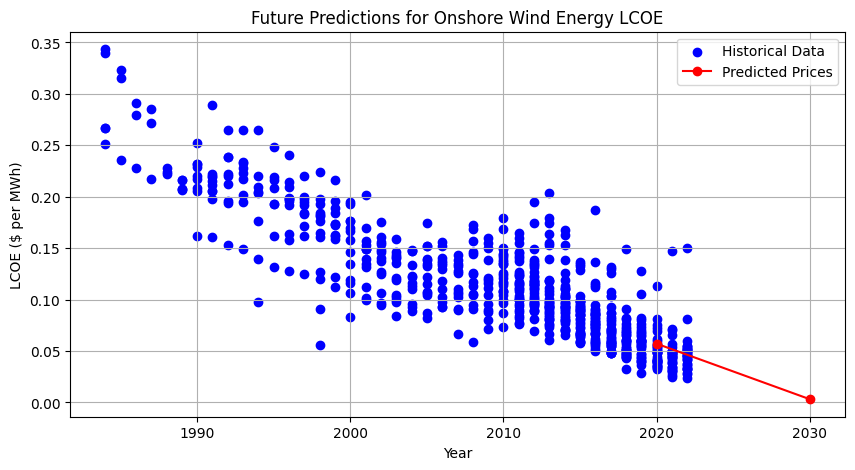

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame that includes a 'Year' and 'Onshore wind levelized cost of energy' column
# First, ensure 'Year' is in the proper format and extract 'X' and 'y'
cleaned_data['Year'] = pd.to_datetime(cleaned_data['Year']).dt.year.copy()  # Convert 'Year' to just the year number if it's in datetime format
X = cleaned_data[['Year']].copy()  # Predictor variable (needs to be 2D for sklearn)
y = cleaned_data['Onshore wind levelized cost of energy'].copy()  # Target variable

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)  # Fit the model

# Now you can safely make predictions
future_years = np.array([[2020], [2030]])
predicted_prices = model.predict(future_years).copy()

# Print predicted prices
for year, price in zip(future_years.flatten(), predicted_prices):
    print(f"Predicted Levelized Cost of Energy in {year}: ${price:.2f} per MWh")

# Optional: Plotting the results for visualization
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(future_years, predicted_prices, 'ro-', label='Predicted Prices')
plt.title('Future Predictions for Onshore Wind Energy LCOE')
plt.xlabel('Year')
plt.ylabel('LCOE ($ per MWh)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assume 'model' is your fitted LinearRegression model and 'X' contains the year values
future_years = np.array([[2020], [2030]]).copy()
predicted_prices = model.predict(future_years).copy()

for year, price in zip(future_years.flatten(), predicted_prices):
    print(f"Predicted Levelized Cost of Energy in {year}: ${price:.2f} per MWh")


Predicted Levelized Cost of Energy in 2020: $0.06 per MWh
Predicted Levelized Cost of Energy in 2030: $0.00 per MWh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


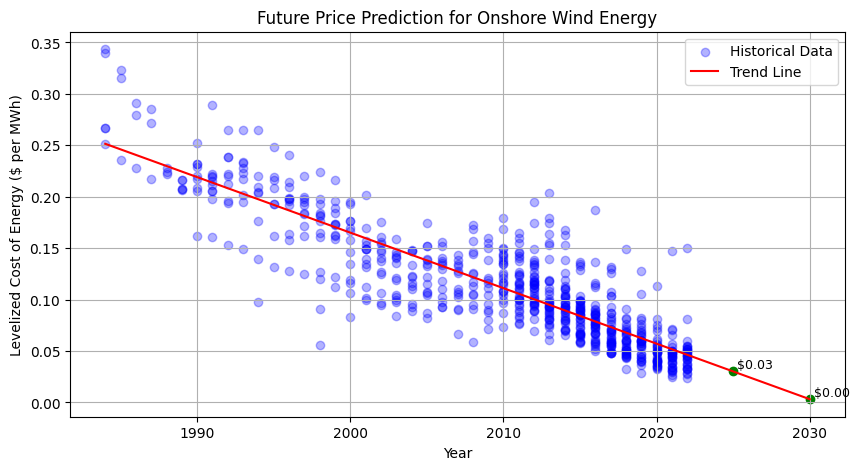

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extend the year range to include future years
X_extended = np.linspace(cleaned_data['Year'].min(), 2030, 300).reshape(-1, 1).copy()
y_extended_pred = model.predict(X_extended).copy()

# Extract specific future years for display
future_years = np.array([[2025], [2030]]).copy()
future_predictions = model.predict(future_years).copy()

# Plotting the historical data
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['Year'], cleaned_data['Onshore wind levelized cost of energy'], alpha=0.3, color='blue', label='Historical Data')

# Plotting the regression trend line
plt.plot(X_extended.flatten(), y_extended_pred, 'r-', label='Trend Line')

# Highlighting future predictions
for year, cost in zip(future_years.flatten(), future_predictions):
    plt.scatter(year, cost, color='green')  # Mark the predicted points on the graph
    plt.text(year, cost, f' ${cost:.2f}', fontsize=9, verticalalignment='bottom')  # Annotate the predicted cost

plt.title('Future Price Prediction for Onshore Wind Energy')
plt.xlabel('Year')
plt.ylabel('Levelized Cost of Energy ($ per MWh)')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion
The data illustrates a consistent decline in the levelized cost of onshore wind energy over several decades, highlighting improvements in technology and cost-efficiency. The linear regression model predicts a continuation of this downward trend, with a forecast that by 2030, costs will decrease further, making wind energy increasingly economical. The use of a 5-year rolling average confirms the smooth, downward trend, emphasizing greater predictability in cost reductions. Future projections suggest that wind energy will remain a competitive and viable option in the renewable energy landscape, potentially reaching even lower price points by 2030.

Due to limitations in data availability for other renewable energy technologies, this analysis primarily focuses on onshore wind energy. However, preliminary assessments suggest that the trends observed in onshore wind may reflect broader movements within the renewable sector, potentially indicating similar advancements and cost reductions across other technologies. Further data collection and analysis are necessary to confirm these observations across the broader renewable energy spectrum.
